First, let's import the two libraries we will be using: matplotlib and dpd. matplotlib is a common plotting library. dpd is my transportation library that contains the two functions we will be using: url2gtfs and plot_schedule. You can install the dpd package by running `pip install git+https://github.com/davidbailey/dpd.git`.

In [1]:
import matplotlib.pyplot as plt

from dpd.gtfs import url2gtfs, plot_schedule

Next, we'll use url2gtfs to download the GTFS file from Sacramento RTD.

In [2]:
rtd = url2gtfs('http://iportal.sacrt.com/gtfs/SRTD/google_transit.zip')

Now we can use get_routes() to see the routes in this GTFS file. In this case, we'll focus on the Blue Line which has a route_id of "533".

In [14]:
rtd.get_routes().tail()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
63,255,SRTD,255,LA RIVIERA - COLLEGE GREENS,3,FF0080,FFFFFF
64,30,SRTD,30,FSL,3,00FF00,000000
65,507,SRTD,Gold,Downtown - Folsom,0,EED211,000000
66,519,SRTD,Green,13th - Richards/Township 9,0,008040,FFFFFF
67,533,SRTD,Blue,Meadowview - Watt/I-80,0,0000FF,FFFFFF


We also need to know the service_id which specifies the type of service: weekday, weekend, etc. In this case "1" is weekday.

In [17]:
rtd.trips[rtd.trips["route_id"] == "533"].head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
2388,533,1,860715,BLUE LINE TO CRC,0,0007,35057
2389,533,1,860716,BLUE LINE TO CRC,0,0009,35057
2390,533,1,860717,BLUE LINE TO CRC,0,0001,35057
2391,533,1,860718,BLUE LINE TO CRC,0,0003,35057
2392,533,1,860719,BLUE LINE TO CRC,0,0005,35057


Now we simply use plot_schedule to plot the weekday service for the Blue Line. We see there is a pretty consistant service throughout the day with less service in the late night. Service starts around 4am and goes to just past midnight. It looks like all the trains are stored somewhere in the middle of the line. There also appears to be eight points along the route where trains pass each other.

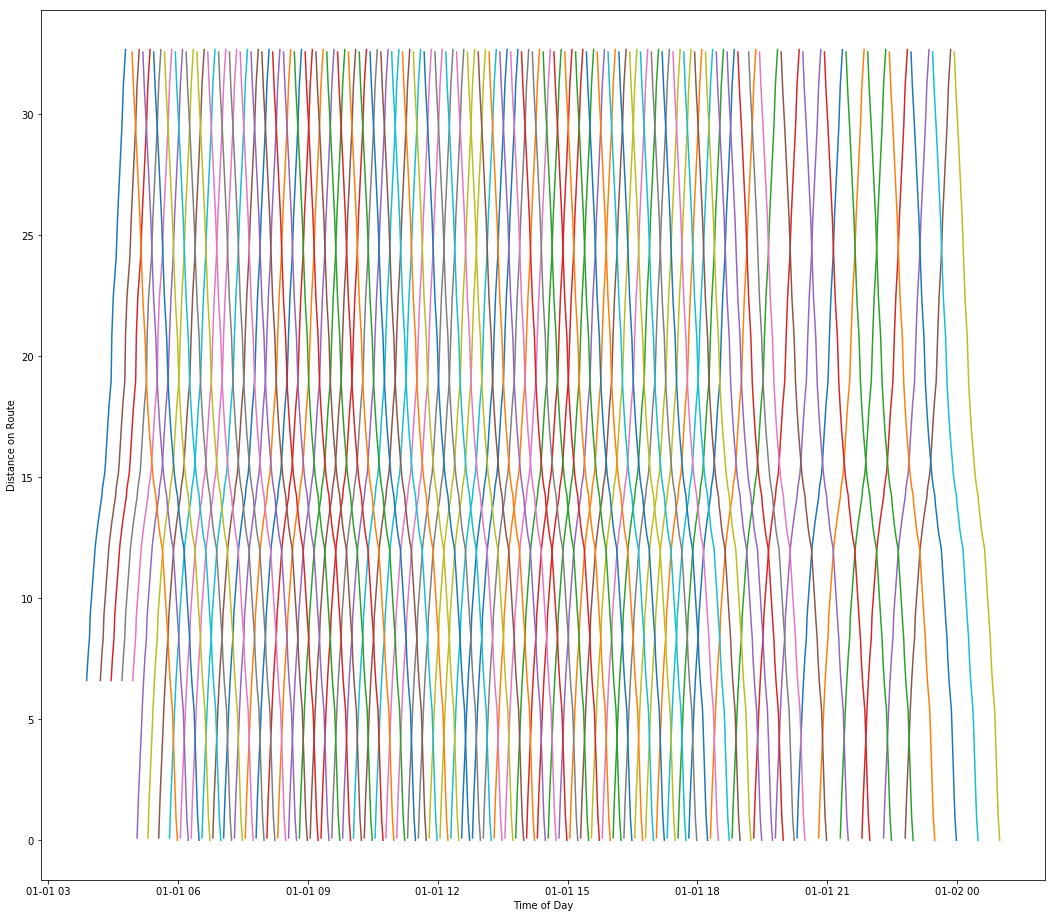

In [21]:
fig = plt.figure(figsize=(18, 16))
plot_schedule(rtd, "533", "1")

Now we will look at the Los Angeles Metro Expo Line. We follow the same steps to find the route_id, "806", and service_id, "RDEC19-801-1_Weekday-02".

In [4]:
metro = url2gtfs("https://gitlab.com/LACMTA/gtfs_rail/raw/master/gtfs_rail.zip")

In [5]:
metro.get_routes()

,route_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,route_url
0,801,NaN,Metro A Line (Blue),NaN,0,004DAC,FFFFFF,http://www.metro.net/around/rail/blue-line/
1,802,NaN,Metro Red Line (802),NaN,1,EE3A43,FFFFFF,http://www.metro.net/around/rail/red-line/
2,803,NaN,Metro Green Line (803),NaN,0,2EAB00,FFFFFF,http://www.metro.net/around/rail/green-line/
3,804,NaN,Metro Gold Line (804),NaN,0,DA7C20,FFFFFF,http://www.metro.net/around/rail/gold-line/
4,806,NaN,Metro E Line (Expo),NaN,0,5BC2E7,000000,http://www.metro.net/around/rail/expo-line/
5,805,NaN,Metro Purple Line (805),NaN,1,9561A9,FFFFFF,http://www.metro.net/around/rail/purple-line/


In [20]:
metro.trips[metro.trips["route_id"] == "806"].head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,806,RDEC19-801-1_Weekday-02,50098889,NaN,1,621,806SB_160306
3,806,RDEC19-801-1_Weekday-02,50098892,NaN,1,619,806SB_160306
4,806,RDEC19-801-1_Weekday-02,50098893,NaN,1,606,806SB_160306
5,806,RDEC19-801-1_Weekday-02,50098894,NaN,0,619,806NB_160306
6,806,RDEC19-801-1_Weekday-02,50098895,NaN,1,615,806SB_160306


Here we can see three distinct service patterns thorughout the day: rush-hour service in the morning and evening, consistant midday service, and reduced service at night. We also see that service is much more frequent than the RTD service above and trains pass each other much more frequently: fifteen point along the route during rush hour service.

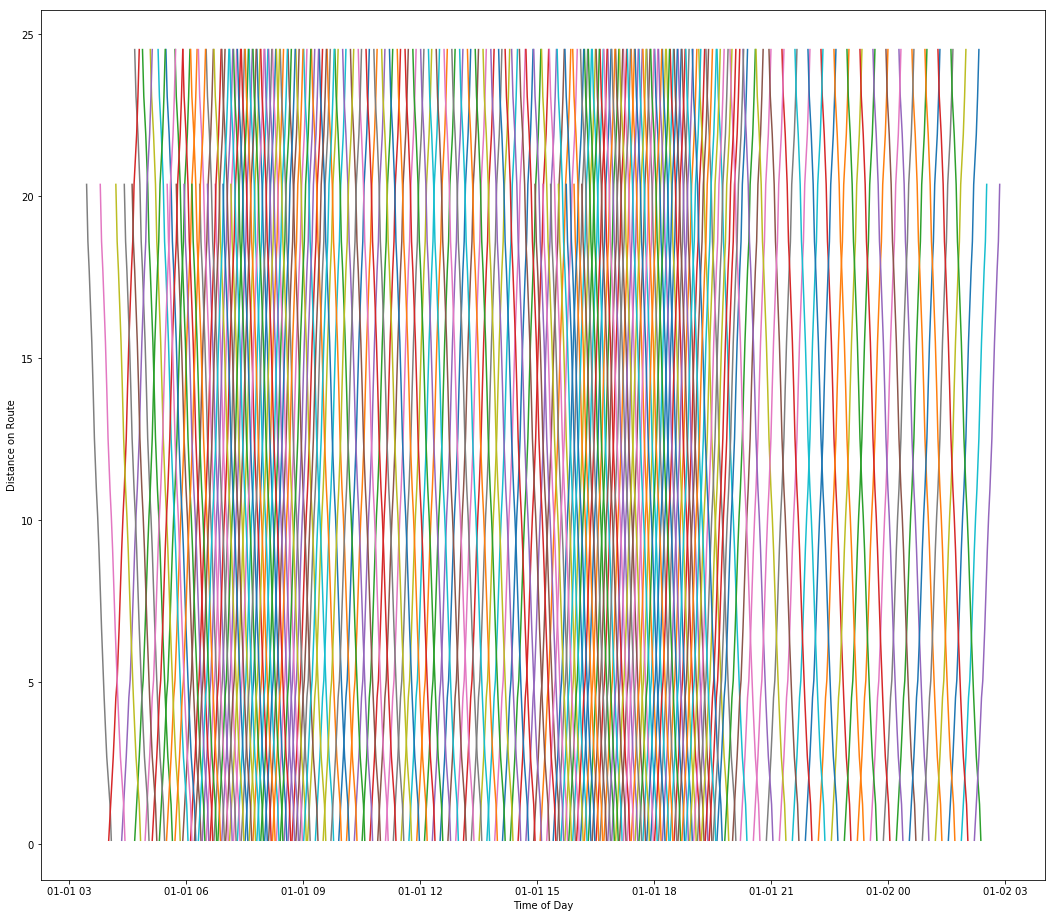

In [7]:
fig = plt.figure(figsize=(18, 16))
plot_schedule(metro, "806", "RDEC19-801-1_Weekday-98")

Last, we look at Metrolink commuter rail service.

In [8]:
metrolink = url2gtfs("https://www.metrolinktrains.com/globalassets/about/gtfs/gtfs.zip")

In [9]:
metrolink.routes

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color,displayable
0,91 Line,Metrolink,91/PVL,91/Perris Valley Line,2,http://www.metrolinktrains.com/schedules/,0071CE,FFFFFF,1
1,Antelope Valley Line,Metrolink,NaN,Antelope Valley Line,2,http://www.metrolinktrains.com/schedules/,00AF43,FFFFFF,1
2,Inland Emp.-Orange Co. Line,Metrolink,NaN,Inland Empire - OC,2,http://www.metrolinktrains.com/schedules/,E92076,FFFFFF,1
3,Orange County Line,Metrolink,NaN,Orange County Line,2,http://www.metrolinktrains.com/schedules/,FF8400,FFFFFF,1
4,Riverside Line,Metrolink,NaN,Riverside Line,2,http://www.metrolinktrains.com/schedules/,682E86,FFFFFF,1
5,San Bernardino Line,Metrolink,NaN,San Bernardino Line,2,http://www.metrolinktrains.com/schedules/,A32136,FFFFFF,1
6,Ventura County Line,Metrolink,NaN,Ventura County Line,2,http://www.metrolinktrains.com/schedules/,FFB81D,000000,1
7,LAX FlyAway Bus,Metrolink,NaN,LAX FlyAway Bus,3,http://www.metrolinktrains.com/schedules/,000000,FFFFFF,1


In [10]:
metrolink.trips[metrolink.trips["route_id"] == "San Bernardino Line"].head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id
13,San Bernardino Line,SBL-MTWTF-20191013,200000027-20191013,San Bernardino - Downtown,306,0
14,San Bernardino Line,SBL-MTWTF-20191013,200000028-20191013,L.A. Union Station,323,1
227,San Bernardino Line,SBL-MTWTF-20191013,295100222-20191013,L.A. Union Station,301,1
228,San Bernardino Line,SBL-MTWTF-20191013,295100223-20191013,L.A. Union Station,303,1
229,San Bernardino Line,SBL-MTWTF-20191013,295100226-20191013,L.A. Union Station,305,1


Because Metrolink does not include a shape_id in their trips table, we have to specifiy it ourselves. We can find the possible shape_ids in the shapes table.

In [11]:
metrolink.shapes["shape_id"].unique()

array(['91in', '91out', 'AVout', 'IEOCin', 'IEOCout', 'LAXin', 'LAXout',
       'OCin', 'OCout', 'RIVERin', 'RIVERout', 'SBin', 'SBout', 'AVin',
       'VTin', 'VTout'], dtype=object)

We can easily see that service is less frequent than the above light rail lines. We can also see that a most of the service is peak-direction only with only a few opposite direction trains. Also, we can see that this service requires a minimum of eight trains positioned in San Bernadino each morning.

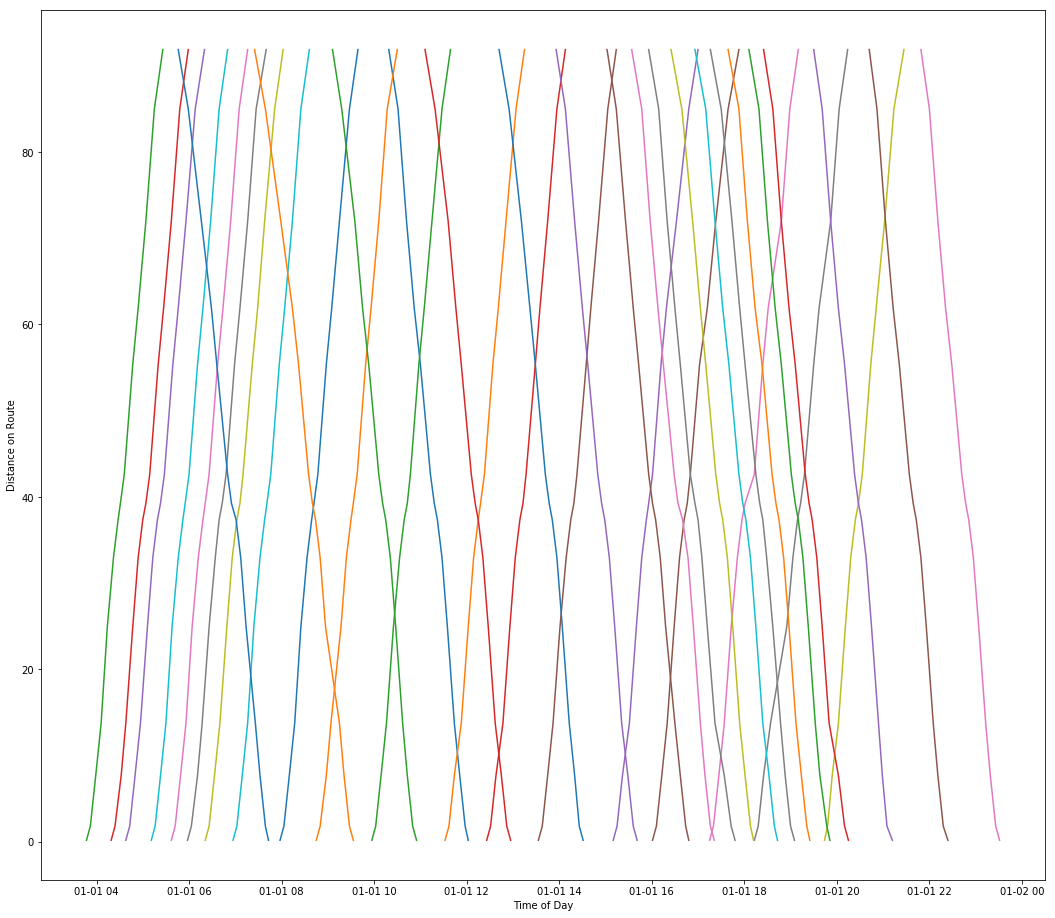

In [12]:
fig = plt.figure(figsize=(18, 16))
plot_schedule(metrolink, "San Bernardino Line", "SBL-MTWTF-20191013", "SBin")